###### 本文是公众号王的机器2019-05-03文章的摘录。
- 自己的理解。(原文注释有个别错误)
- 代码练习

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
# Jupyter notebook 里面内嵌画图的
%matplotlib inline  

In [12]:
# 百度echarts的调色
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

#### 思路：
- 第一章介绍 matplotlib 中的绘图逻辑，图包含的重要元素和他们之间的层级 (hierarchy)


- 第二章只关注折线图 (line chart)，但是一步步从最初的烂图完善到最终的美图。这样可以把一种类型的图中的性质吃透，类比到其他类型的图一点也不难。


- 第三章从画图的四大目的出发，即分布、联系、比较和构成，介绍了相对应的直方图 (historgram chart)，散点图 (scatter chart)，折线图 (line chart) 和饼状图 (pie chart)。这章偏向于用合适的图来实现不同的目的，没有在如何完善图的方面上下功夫，但在最后一节提到了如何画出使信息更有效的表达的图。

### 第一章
#### 1.1概览
Matplotlib 是一个巨无霸，咋一看无从下手，只能分解之后各点击破。总体来说，它包含两类元素：



- 基础 (primitives) 类：线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等。



- 容器 (containers) 类：图 (figure), 坐标系 (axes, axes是axis的复数型), 坐标轴 (axis) 和刻度 (tick)



基础类元素是我们想画出的标准对象，而容器类元素是基础类元素的寄居出，它们也有层级结构。
- 图figure
- 坐标系, xAxis和yAxis
- 坐标轴, 上有刻度
- 刻度， MajorTicks和MinorTicks


In [38]:
plt.figure() #此时是一个默认432*288的展板，上面没有坐标系Axes

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

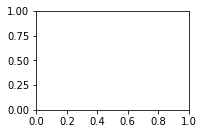

fig.axes: [<matplotlib.axes._subplots.AxesSubplot object at 0x115b67410>] 

ax.xaxis: XAxis(54.000000,154.603636)
ax.yaxis: YAxis(54.000000,154.603636) 

ax.xaxis.majorTicks: [<matplotlib.axis.XTick object at 0x115d98590>, <matplotlib.axis.XTick object at 0x116316150>, <matplotlib.axis.XTick object at 0x115d7ae90>, <matplotlib.axis.XTick object at 0x1154952d0>, <matplotlib.axis.XTick object at 0x115495890>, <matplotlib.axis.XTick object at 0x115495ed0>] 

ax.yaxis.majorTicks: [<matplotlib.axis.YTick object at 0x115d6c4d0>, <matplotlib.axis.YTick object at 0x115d98c10>, <matplotlib.axis.YTick object at 0x115d7aad0>, <matplotlib.axis.YTick object at 0x115494690>, <matplotlib.axis.YTick object at 0x115494dd0>] 

ax.xaxis.minorTicks: [<matplotlib.axis.XTick object at 0x115d85210>]
ax.yaxis.minorTicks: [<matplotlib.axis.YTick object at 0x115d7a750>]


In [75]:
fig = plt.figure()          # 此时是一个默认432*288的展板，上面没有坐标系Axes
ax = fig.add_subplot(2,2,1) # 增加坐标系
plt.show()

xax = ax.xaxis
yax = ax.yaxis

print( 'fig.axes:', fig.axes, '\n')
print( 'ax.xaxis:', xax )
print( 'ax.yaxis:', yax, '\n' )
print( 'ax.xaxis.majorTicks:', xax.majorTicks, '\n' )
print( 'ax.yaxis.majorTicks:', yax.majorTicks, '\n')
print( 'ax.xaxis.minorTicks:', xax.minorTicks )
print( 'ax.yaxis.minorTicks:', yax.minorTicks )

从打印结果可看出坐标系、坐标轴和刻度都是对象。细看一下发现 xaxis 和 yaxis 上面都有 6 个主刻度 (majorTicks)。

创造完以上四个容器元素后，我们可在上面添加各种基础元素，比如：
- 在坐标轴和刻度上添加标签Label
- 在坐标系中添加线line、点point、网格grid、图例Legend和文字Text
- 在图中添加图例

***
#### 1.2图
图是整个层级的顶部。



> 在图中可以添加基本元素「文字」。

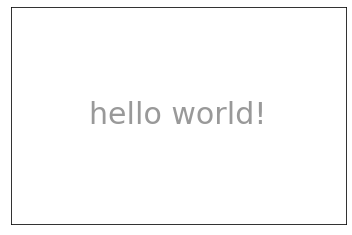

In [66]:
plt.figure()
plt.text( 0.5, 0.5, 'hello world!', ha='center', 
          va='center', size=30, alpha=.4 )
plt.xticks([]), plt.yticks([])
plt.show()

第一、二个参数是指横轴和纵轴坐标

第三个参数字符是指要显示的内容

ha, va 是横向和纵向位置

size 设置字体大小

alpha 设置字体透明度 (0.5 是半透明)

> 在图中可以添加基本元素「图片」

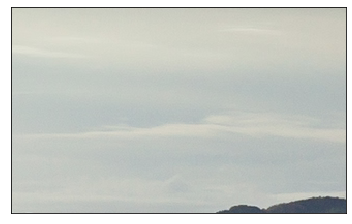

In [58]:
import numpy as np
from PIL import Image
plt.figure()
plt.xticks([]), plt.yticks([])
im = np.array(Image.open("1.png"))
plt.imshow(im)

用 Image.open() 将图片转成像素存在 ndarray 中，再用 plt.imshow() 展示。

> 在图中可以添加基本元素「折线」。

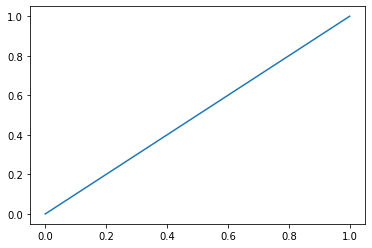

In [72]:
plt.figure()
plt.plot( [0,1],[0,1] )
plt.show()

plt.plot() 函数是用来画折线图的，前两个参数分别是 x 和 y，该函数会在第二节细讲。

当我们每次说画东西，看起来是在图 (Figure) 里面进行的，实际上是在坐标系 (Axes) 里面进行的。一幅图中可以有多个坐标系，因此在坐标系里画东西更方便 (有些设置使用起来也更灵活)。

---
#### 1.3 坐标系 子图
一幅图 (Figure) 中可以有多个坐标系 (Axes)，那不是说一幅图中有多幅子图 (Subplot)，因此坐标系和子图是不是同样的概念？
❌两者有一点细微差别：
- 子图在母图中的网格结构一定是规则的
- 坐标系在母图中的网格结构可以是不规则的

⚠️可以说subplot是Axes的特例。

> 子图

把图想成矩阵，那么子图就是矩阵中的元素，因此可像定义矩阵那样定义子图 - (行数、列数、第几个子图)。
- subplot(rows, columns, i-th plots)

例子：2*1子图

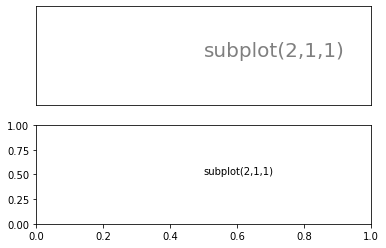

In [81]:
plt.subplot(2,1,1)
plt.xticks([])
plt.yticks([])
plt.text(0.5,0.5, "subplot(2,1,1)", size=20, alpha=0.5)
plt.subplot(2,1,2)
plt.text(0.5,0.5, "subplot(2,1,1)")

plt.show()

这两个子图类似于一个列向量
- subplot(2,1,1) 是第一幅
- subplot(2,1,2) 是第二幅

声明完子图后，下面所有代码就只在这幅子图上生效，直到声明下一幅子图。

例子：2*2子图

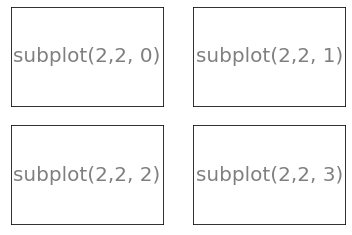

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i, ax in enumerate(axes.flat):
    ax.set(xticks=[], yticks=[])
    s = "subplot(2,2, {})".format(i)
    ax.text(0.5,0.5,s, ha="center", va="center", size=20, alpha=.5)
plt.show()

In [101]:
#解释:
#axes是一个2维度数组，所以flat化为一维数组
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11430f6d0>,
      dtype=object)

这次我们用过坐标系来生成子图 (子图是坐标系的特例嘛)，第 1 行
- fig, axes = plt.subplots(nrows=2, ncols=2)

得到的 axes 是一个 2×2 的对象。在第 3 行的 for 循环中用 axes.flat 将其打平，然后在每个 ax 上生成子图。 



> 坐标系

坐标系比子图更通用，有两种生成方式

- 用 gridspec 包加上 subplot() 

- 用 plt.axes()

https://mp.weixin.qq.com/s?__biz=MzIzMjY0MjE1MA==&mid=2247486895&idx=1&sn=ba9370c3c505e64c10a148d0893c87b6&chksm=e8908ea6dfe707b03697529ff9c4a07e661f68c61ce02247e5e9f91904eff0fa0e29dff18e8e&scene=21#wechat_redirect

###### 用gridspec.GridSpec()

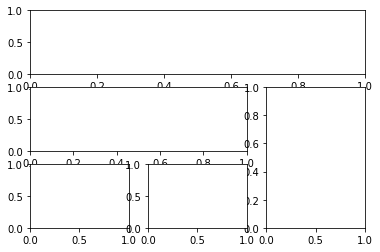

In [111]:
import matplotlib.gridspec as gridspec
G = gridspec.GridSpec(3,3)   #产生3*3的矩阵

ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, :2])  #右边开口的
ax3 = plt.subplot(G[1:, 2])
ax4 = plt.subplot(G[2, 0])
ax5 = plt.subplot(G[2, 1])

第 2 行将整幅图分成 3×3 份赋值给 G，第 4, 8, 12, 16, 20 行分别用



    plt.subplot(G[]) 



生成五个坐标系。G[] 里面的切片和 Numpy 数组用法一样：



G[0, :] = 图的第一行 (Axes 1) , 全列

G[1, :-1] = 图的第二行，第二三列 (Axes 2)

G[1:, -1] = 图的第二三行，第三列 (Axes 3)

G[-1, 0] = 图的第三行，第一列 (Axes 4)

G[-1, -2] = 图的第三行，第二列 (Axes 5)

###### 用axes
-  plt.axes([l,b,w,h]) 

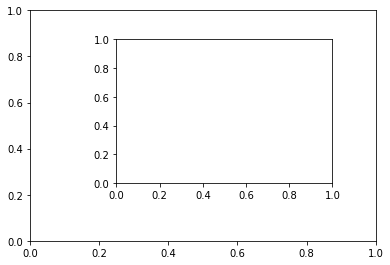

In [114]:
plt.axes([0.0,0.0,0.8,0.8]) 
plt.axes([0.2,0.2,0.5,0.5])

> 两种推举生成坐标系的方法

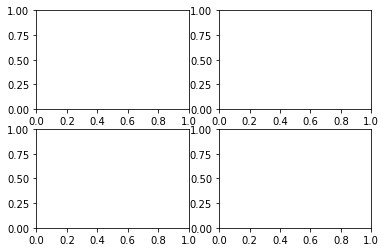

In [119]:
#同时生成图和坐标系。
fig. ax = plt.subplots(2,2)

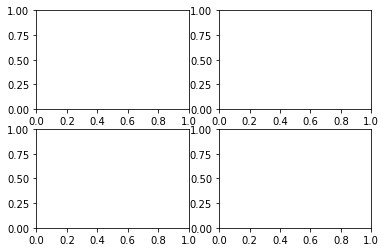

In [122]:
#先生成图，在添加坐标
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax = fig.add_subplot(2,2,2)
ax = fig.add_subplot(2,2,3)
ax = fig.add_subplot(2,2,4)

---
### 1.4 坐标轴
一个坐标系 (Axes)，通常是二维，有两条坐标轴 (Axis)：



- 横轴：XAxis

- 纵轴：YAxis



每个坐标轴都包含两个元素



容器类元素「刻度」，该对象里还包含刻度本身和刻度标签

基础类元素「标签」，该对象包含的是坐标轴标签



「刻度」和「标签」都是对象，下面代码通过改变它们一些属性值来进行可视化。

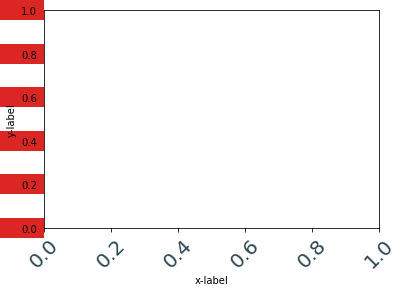

In [129]:
fig, ax = plt.subplots()
ax.set_xlabel("x-label")
ax.set_ylabel("y-label")

for label in ax.xaxis.get_ticklabels():
    # label是一个Text对象
    label.set_color(dt_hex)
    label.set_rotation(45)
    label.set_fontsize(20)
    
for line in ax.yaxis.get_ticklines():
    # line是一个Line2D对象
    line.set_color(r_hex)
    line.set_markersize(500)
    line.set_markeredgewidth(20)
plt.show()

第 2 和 3 行打印出 x 轴和 y 轴的标签。



第 5 到 9 行处理「刻度」对象里的刻度标签，将它颜色设定为深青色，字体大小为 20，旋转度 45 度。



第 11 到 15 行处理「标签」对象的刻度本身 (即一条短线)，将它颜色设定为红色，标记长度和宽度为 500 和 30

In [130]:
# python中一切都是对象
print( ax.xaxis.get_label() )
print( ax.xaxis.get_ticklocs() )
print( ax.xaxis.get_ticklabels() )
print( ax.xaxis.get_ticklines() )
print( ax.xaxis.get_ticks_position() )
print( ax.xaxis.get_major_ticks() )

Text(0.5, 17.199999999999996, 'x-label')
[0.  0.2 0.4 0.6 0.8 1. ]
<a list of 6 Text major ticklabel objects>
<a list of 12 Line2D ticklines objects>
bottom
[<matplotlib.axis.XTick object at 0x116ed03d0>, <matplotlib.axis.XTick object at 0x116eba2d0>, <matplotlib.axis.XTick object at 0x116eb2450>, <matplotlib.axis.XTick object at 0x117091d10>, <matplotlib.axis.XTick object at 0x11709d690>, <matplotlib.axis.XTick object at 0x11709dc90>]


> 刻度展示

不同的 locator() 可以生成不同的刻度对象
[点击看原文关于刻度的描述](https://mp.weixin.qq.com/s?__biz=MzIzMjY0MjE1MA==&mid=2247486895&idx=1&sn=ba9370c3c505e64c10a148d0893c87b6&chksm=e8908ea6dfe707b03697529ff9c4a07e661f68c61ce02247e5e9f91904eff0fa0e29dff18e8e&scene=21#wechat_redirect) 

---
#### 1.6基础元素



目前，我们已经介绍四个最重要的容器以及它们之间的层级



    Figure → Axes → Axis → Ticks

        图 → 坐标系 → 坐标轴 → 刻度



但要画出一幅有内容的图，还需要在容器里添加基础元素比如线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等，具体来说



画一条线，用 plt.plot() 或 ax.plot()

画个记号，用 plt.scatter() 或 ax.scatter()

添加文字，用 plt.text() 或 ax.text()

添加图例，用 plt.legend() 或 ax.legend()

添加图片，用 plt.imshow() 或 ax.imshow()



官网。一个figure的各个部分:
![官网上的图](https://matplotlib.org/_images/anatomy.png "一个图的各个部分")

现在你基本理解了 Matplotlib 里面的绘图逻辑和元素，下两节分别从不同维度 (深度和广度) 研究如何画图：



第二节只研究一种类型的图「折线图」，但从头到尾不断根据需求添加元素完善它。深度研究做到完美！



第三节研究四种类型的图 (展示数据的分布、联系、对比和组成)，却没在美感上下功夫，广度研究满足目的！



但读完后两节后，你应该可以在各种类型的图上做到完美。

## 第二章 画折线图


**画一幅标准普尔 500 指数在 2007-2010 的走势图。**


使用matplotlib中的plt.plot()画图。

首先导入数据，pd.read_csv()

- index_col = 0 是说把第一列 Date 当成行标签 (index)

- parse_dates = True 是说把行标签转成 date 对象

- dayFirst = True 是说日期是 DD/MM/YYYY 这样的格式

In [145]:
import pandas as pd
data = pd.read_csv("S&P500.csv",
                  index_col=0,
                   parse_dates=True,
                   dayfirst=True
                  )

In [147]:
data.head(3).append(data.tail(3))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
2019-04-22,2898.780029,2909.510010,2896.350098,2907.969971,2907.969971,2997950000
2019-04-23,2909.989990,2936.310059,2908.530029,2933.679932,2933.679932,3635030000
2019-04-24,2934.000000,2936.830078,2926.050049,2927.250000,2927.250000,3448960000


S&P 500 的数据从 1950 年 1 月 3 号开始，老板只需要 2007 年 1 月 1 日到 2010 年 1 月 1 日的数据。做个切片即可，存储成 spx。

In [155]:
spx = data["Adj Close"].loc["2007-01-01":'2010-01-01']

In [156]:
spx.head(3).append(spx.tail(3))

Date
2007-01-03    1416.599976
2007-01-04    1418.339966
2007-01-05    1409.709961
2009-12-29    1126.199951
2009-12-30    1126.420044
2009-12-31    1115.099976
Name: Adj Close, dtype: float64

In [158]:
type(spx) #z这里原文注释说是DataFrame估计已经有读者指出了。

pandas.core.series.Series

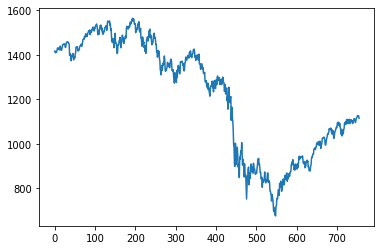

In [160]:
plt.plot(spx.values)

在 plot() 函数里面只有变量 y 时 (y = spx.values)，那么自变量就是默认赋值为 range(len(y))。

此外我们没有设置图的尺寸，像素、线的颜色宽度、坐标轴的刻度和标签、图例、标题等等，所有设置都用的是 matplotlib 的默认设置。

> 图的默认设置的修改

In [162]:
plt.rcParams

/Users/chentianwei/opt/anaconda3/lib/python3.7/site-packages/IPython/lib/pretty.py:695: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

figure size: [6.0, 4.0]
figure dpi: 72.0
line color: C0
line style: -
line width: 1.5
xticks: [-100.    0.  100.  200.  300.  400.  500.  600.  700.  800.]
yticks: [ 600.  800. 1000. 1200. 1400. 1600. 1800.]
xlim: (-37.75, 792.75)
ylim: (632.0990292500001, 1609.58102375)


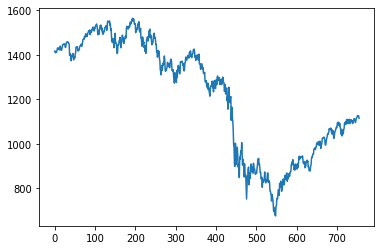

In [165]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot( spx.values )   #原文有错，也可能是版本不兼容的问题，已经改正。

print( 'figure size:', plt.rcParams['figure.figsize'] )
print( 'figure dpi:',plt.rcParams['figure.dpi'] )   #像素
print( 'line color:',plt.rcParams['lines.color'] )
print( 'line style:',plt.rcParams['lines.linestyle'] )
print( 'line width:',plt.rcParams['lines.linewidth'] )
print( 'xticks:', ax.get_xticks() )
print( 'yticks:', ax.get_yticks() )
print( 'xlim:', ax.get_xlim() )
print( 'ylim:', ax.get_ylim() )

> 新需求：图的尺寸太窄了，看不清。

**进行figure的属性设置：**

用 figsize 和 dpi 一起可以控制图的大小和像素。



函数 figsize(w,h) 决定图的宽和高 (单位是英寸)，而属性 dpi 全称 dots per inches，测量每英寸有多少个像素。两个属性一起用，那么得到的图的像素为



- (w*dpi, h*dpi)



套用在下面代码中，我们其实将图的大小设置成 16×6 平方英寸，而像素设置成 (1600, 600)，所以dpi = 100。



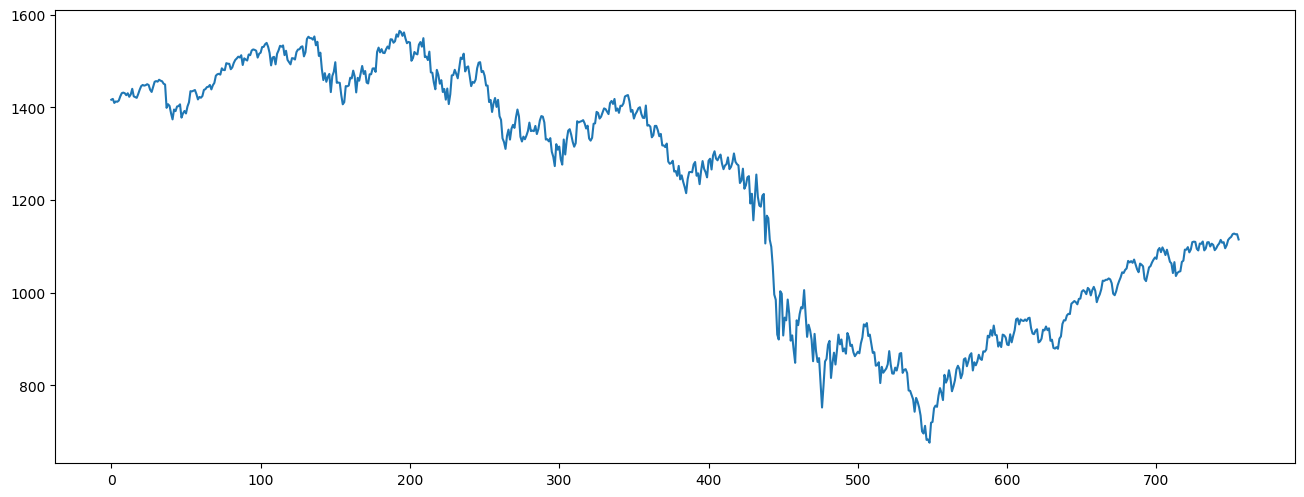

In [170]:
plt.figure(figsize=(16,6), dpi=100)
plt.plot(spx.values)
plt.show()

> 新需求--老板：线条有点纤细，这种蓝也不高雅。

使用下面的参数修改
- color  
- linewidth
- linestyle

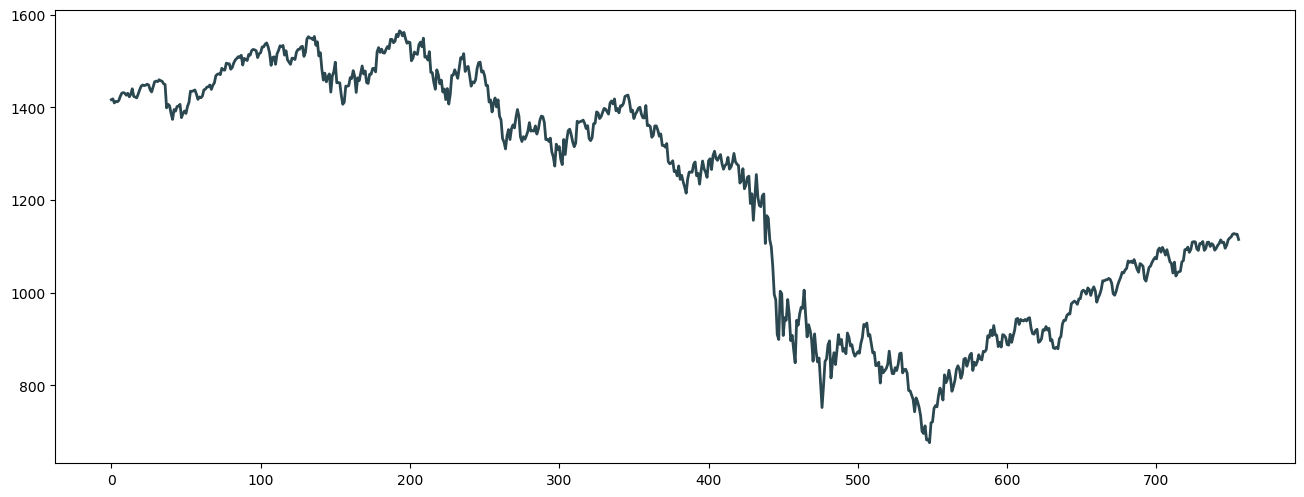

In [174]:
plt.figure(figsize=(16,6), dpi=100)
plt.plot(spx.values, color=dt_hex, linewidth=2, linestyle="-")
plt.show()

> 新需求--老板：横轴怎么是数字，不应该是日期么？另外这条线快碰到天花板了。

这个需求合理，设置下横轴和纵轴的边界就可以了。

- ax.plot() 来画折线

- ax.set_xlim(), ax_set_ylim() 来设置横轴和纵轴的边界

(732679.0, 733772.0)

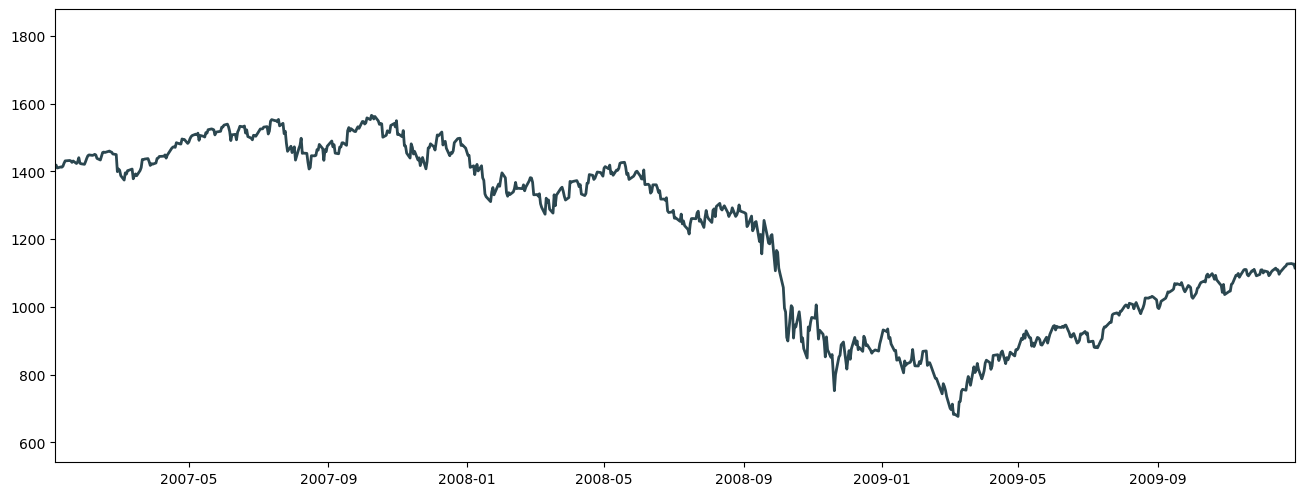

In [206]:
fig = plt.figure(figsize=(16, 6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = spx.index
y = spx.values
ax.plot(x, y , color=dt_hex, linewidth=2, linestyle="-")
ax.set_ylim(y.min()*0.8, y.max()*1.2)
ax.set_xlim(left=x[0], right=x[-1])    #和原文代码有区别。

In [207]:
x[-1]

Timestamp('2009-12-31 00:00:00')

第 7 行将横轴的上下边界设为 2007-01-01 和 2009-12-31，只好是整个时间序列的起始日和终止日。

如此，x轴有了日期，同时线距离图的顶部也有了距离。

> 新需求，横轴日期，没有日，不精确。

上图横轴的刻度个数 (老板说日期隔得有点开) 和标签显示 (老板说只有年月) 都是默认设置。所以要修改：
- ax.set_ticks() 
- ax.set_xticklabels()

[Text(0, 0, '2007-01-03'),
 Text(0, 0, '2007-03-02'),
 Text(0, 0, '2007-04-30'),
 Text(0, 0, '2007-06-26'),
 Text(0, 0, '2007-08-22'),
 Text(0, 0, '2007-10-18'),
 Text(0, 0, '2007-12-14'),
 Text(0, 0, '2008-02-13'),
 Text(0, 0, '2008-04-11'),
 Text(0, 0, '2008-06-09'),
 Text(0, 0, '2008-08-05'),
 Text(0, 0, '2008-10-01'),
 Text(0, 0, '2008-11-26'),
 Text(0, 0, '2009-01-27'),
 Text(0, 0, '2009-03-25'),
 Text(0, 0, '2009-05-21'),
 Text(0, 0, '2009-07-20'),
 Text(0, 0, '2009-09-15'),
 Text(0, 0, '2009-11-10')]

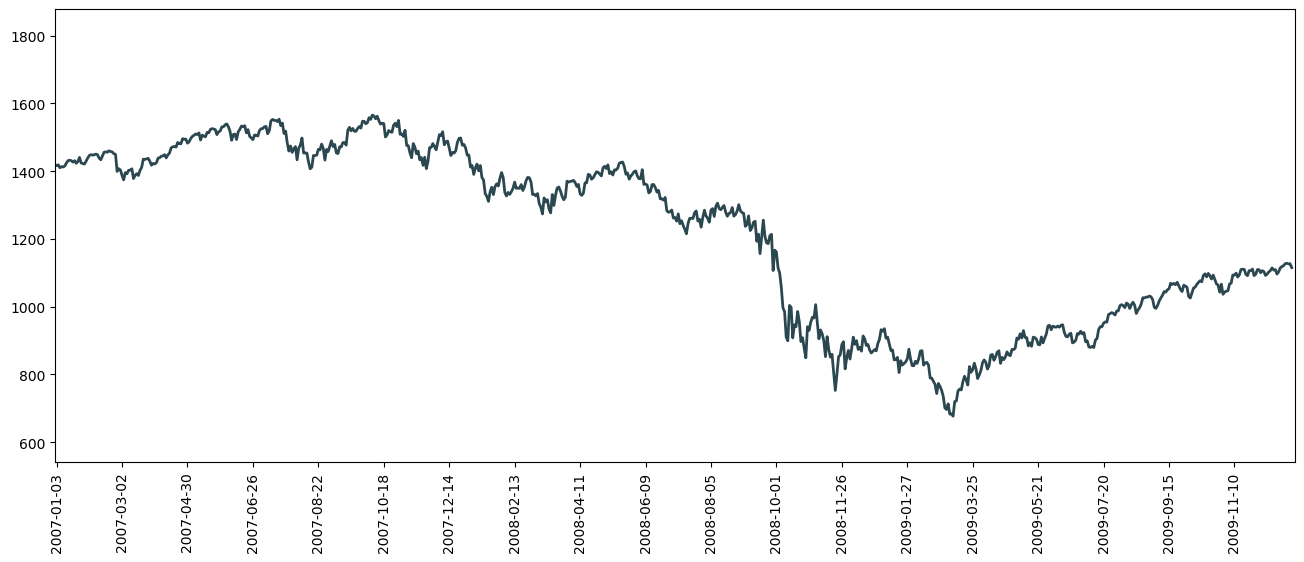

In [219]:
fig = plt.figure(figsize=(16, 6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = spx.index
y = spx.values
ax.plot(y, color=dt_hex, linewidth=2, linestyle="-") #去掉x参数

ax.set_ylim(y.min()*0.8, y.max()*1.2)
ax.set_xlim(-1, len(x)+1)

ax.set_xticks(range(0, len(x), 40))
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()],
                   rotation=90)


第5行ax.plot()去掉x参数，横轴会在后面重写。

第7行设置横轴的边界，下界是 - 1，上界是 len(x) +1。

第10行先设置横轴「数值刻度」为 range(0,len(x), 40)，即 0, 40, 80, ....

第 11 行在这些「数值刻度」上写标签，即格式为 %Y-%m-%d 的日期。由于日期个数比较多，而且日期字符比较长，直接在图中显示出来会相互重叠非常难看。这里调节参数 rotation = 90 使得日期逆时针转了 90 度，看上图效果好多了。

> 新需求，添加图例

1. 在ax.plot()内加上label参数
2. ax.legend()可以对图例进行位置等进一步的参数设置。

[Text(0, 0, '2007-01-03'),
 Text(0, 0, '2007-03-02'),
 Text(0, 0, '2007-04-30'),
 Text(0, 0, '2007-06-26'),
 Text(0, 0, '2007-08-22'),
 Text(0, 0, '2007-10-18'),
 Text(0, 0, '2007-12-14'),
 Text(0, 0, '2008-02-13'),
 Text(0, 0, '2008-04-11'),
 Text(0, 0, '2008-06-09'),
 Text(0, 0, '2008-08-05'),
 Text(0, 0, '2008-10-01'),
 Text(0, 0, '2008-11-26'),
 Text(0, 0, '2009-01-27'),
 Text(0, 0, '2009-03-25'),
 Text(0, 0, '2009-05-21'),
 Text(0, 0, '2009-07-20'),
 Text(0, 0, '2009-09-15'),
 Text(0, 0, '2009-11-10')]

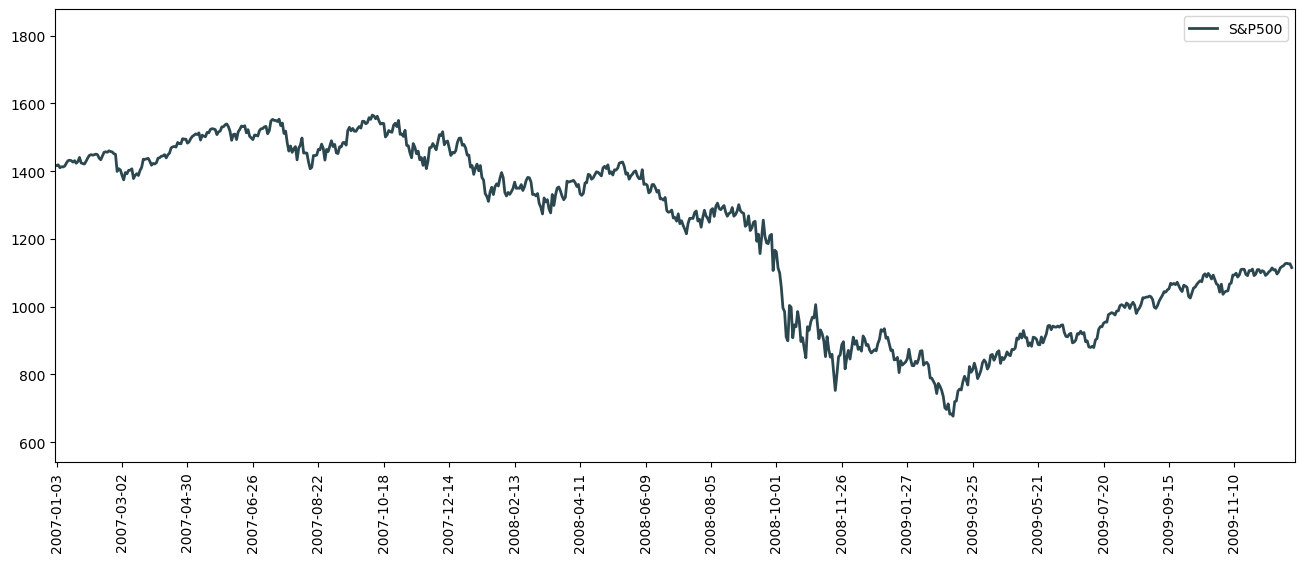

In [228]:
fig = plt.figure(figsize=(16, 6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = spx.index
y = spx.values
ax.plot(y, color=dt_hex, linewidth=2, linestyle="-", label="S&P500") #去掉x参数

ax.legend(loc="best", frameon=True)

ax.set_ylim(y.min()*0.8, y.max()*1.2)
ax.set_xlim(-1, len(x)+1)

ax.set_xticks(range(0, len(x), 40))
data_x = [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()] #去掉时间
ax.set_xticklabels(data_x, rotation=90)

> 新需求： 添加第2幅图
>> 老板：把恐慌指数 VIX 也加进去。


In [235]:
data_vix = pd.read_csv('VIX.csv', 
                       index_col=0, 
                       parse_dates=True, 
                       dayfirst=True)
vix = data_vix[['Adj Close']].loc['2007-01-01':'2010-01-01']
vix.head(3).append(vix.tail(3))

,Adj Close
Date,
2007-01-03,12.040000
2007-01-04,11.510000
2007-01-05,12.140000
2009-12-29,20.010000
2009-12-30,19.959999
2009-12-31,21.680000


添加第二幅图也很简单，用两次 plt.plot() 或者 ax.plot() 即可。

在本例中两者可以随意使用，但两者在使用「.methods」时有个小细节不知道大家注意到没有
- plt.xlim

- plt.ylim

- plt.xticks



- ax.set_xlim

- ax.set_ylim

- ax.set_xticks

[Text(0, 0, '2007-01-03'),
 Text(0, 0, '2007-03-02'),
 Text(0, 0, '2007-04-30'),
 Text(0, 0, '2007-06-26'),
 Text(0, 0, '2007-08-22'),
 Text(0, 0, '2007-10-18'),
 Text(0, 0, '2007-12-14'),
 Text(0, 0, '2008-02-13'),
 Text(0, 0, '2008-04-11'),
 Text(0, 0, '2008-06-09'),
 Text(0, 0, '2008-08-05'),
 Text(0, 0, '2008-10-01'),
 Text(0, 0, '2008-11-26'),
 Text(0, 0, '2009-01-27'),
 Text(0, 0, '2009-03-25'),
 Text(0, 0, '2009-05-21'),
 Text(0, 0, '2009-07-20'),
 Text(0, 0, '2009-09-15'),
 Text(0, 0, '2009-11-10')]

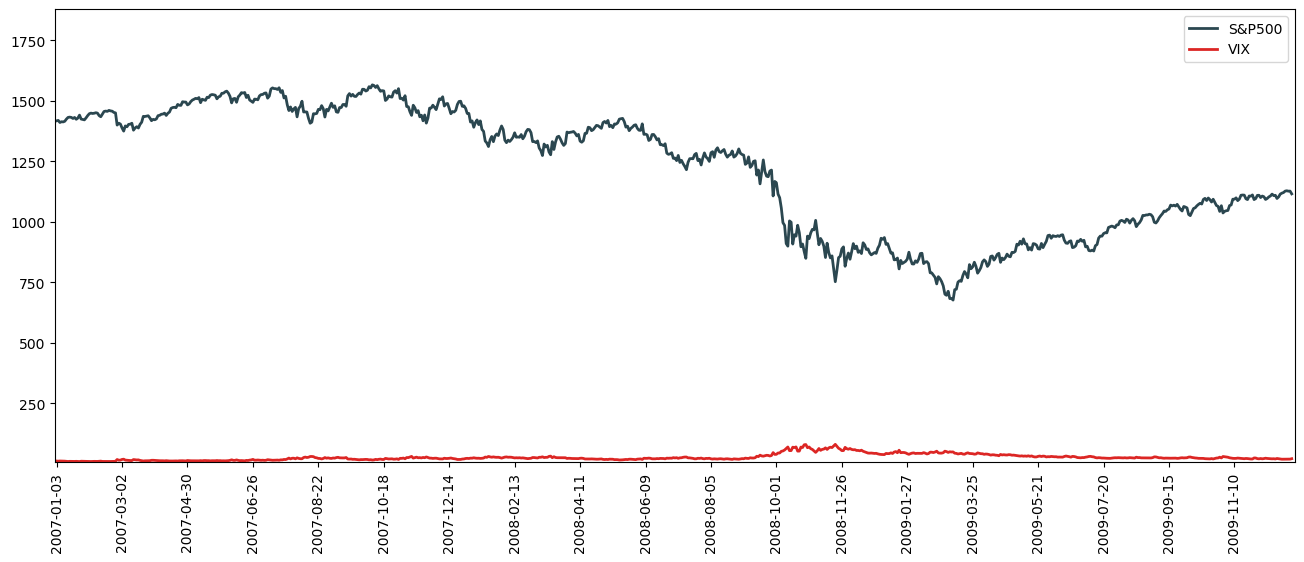

In [271]:
fig = plt.figure(figsize=(16, 6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = spx.index
y1 = spx.values
y2 = vix.values
ax.plot(y1, color=dt_hex, linewidth=2, linestyle="-", label="S&P500") #去掉x参数
ax.plot(y2, color=r_hex, linewidth=2, linestyle="-", label="VIX")
ax.legend(loc="best", frameon=True)


ax.set_ylim((y1.min() if y1.min() < y2.min() else y2.min())*0.8, 
             np.stack((y1, y2.flatten())).max()*1.2
           )  #找到y1,y2中的最小和最大值。
ax.set_xlim(-1, len(x)+1)

ax.set_xticks(range(0, len(x), 40))
data_x = [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()] #去掉时间
ax.set_xticklabels(data_x, rotation=90)


第11行，用了不同的方法来得到最小值。

- 第一种，用if判断的三元表达式
- 第2种， 知道y2是2维数组所以先扁平flatten(), 然后stack后，在求最小/大值

但得到的图表，vix几乎是直线，这样的图❌，不具备分析价值。

> 改进： 用2个坐标系，或者用2幅图

出现这样的图的原因是，s&500的量纲是千位数，而vix的量纲是两位数。所以：

- 用two axes
- 或two subplots

###### two axes

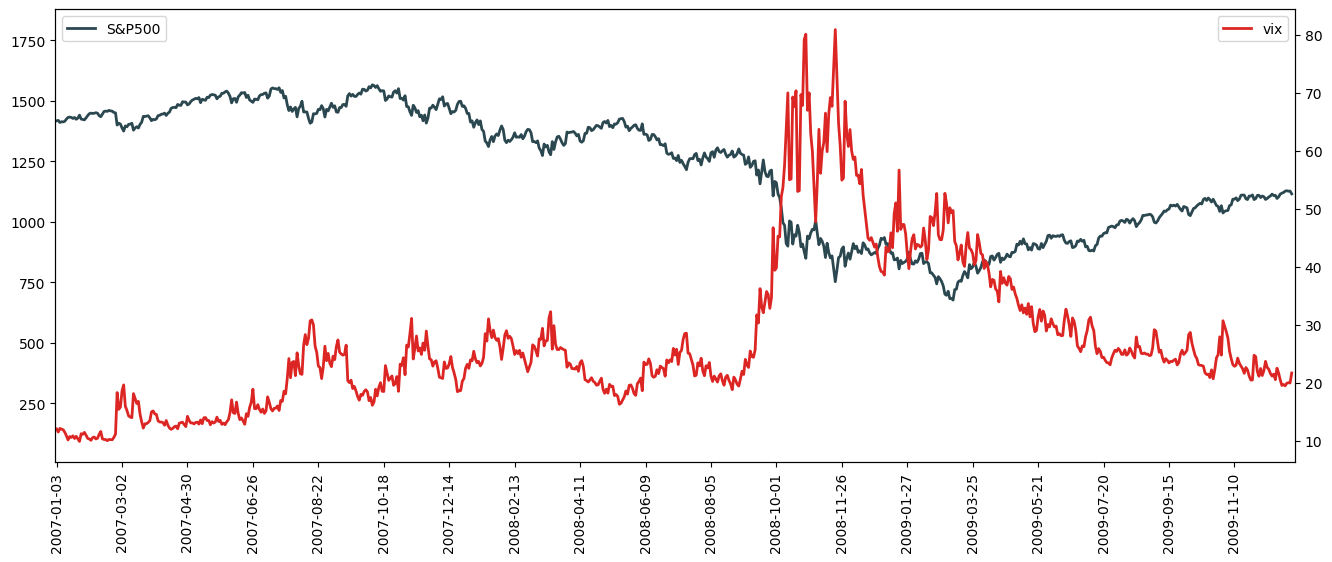

In [281]:
fig = plt.figure(figsize=(16,6), dpi=100)
ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

#绘制第一张图
ax1.plot(y1, color=dt_hex, linewidth=2, linestyle="-", label="S&P500")
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim(np.stack((y1, y2.flatten())).min()*0.8,
            np.stack((y1, y2.flatten())).max()*1.2)

ax1.set_xticks(range(0, len(x), 40))
data_x = [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()]
ax1.set_xticklabels(data_x, rotation=90)
ax1.legend(loc="upper left", frameon=True)

#绘制第二幅图
ax2 = ax1.twinx() #🌿
ax2.plot(y2, color=r_hex, linewidth=2, linestyle="-", label="vix")
ax2.legend(loc="upper right", frameon=True)

用 ax1 和 ax2 就能实现在两个坐标系上画图，代码核心部分是第 19 行的
- **ax2 = ax1.twinx()**

twinx()的解释Create a twin Axes sharing the xaxis，即创建一个共享x轴的图。

twiny()则创建共享y轴的图

##### two subplots

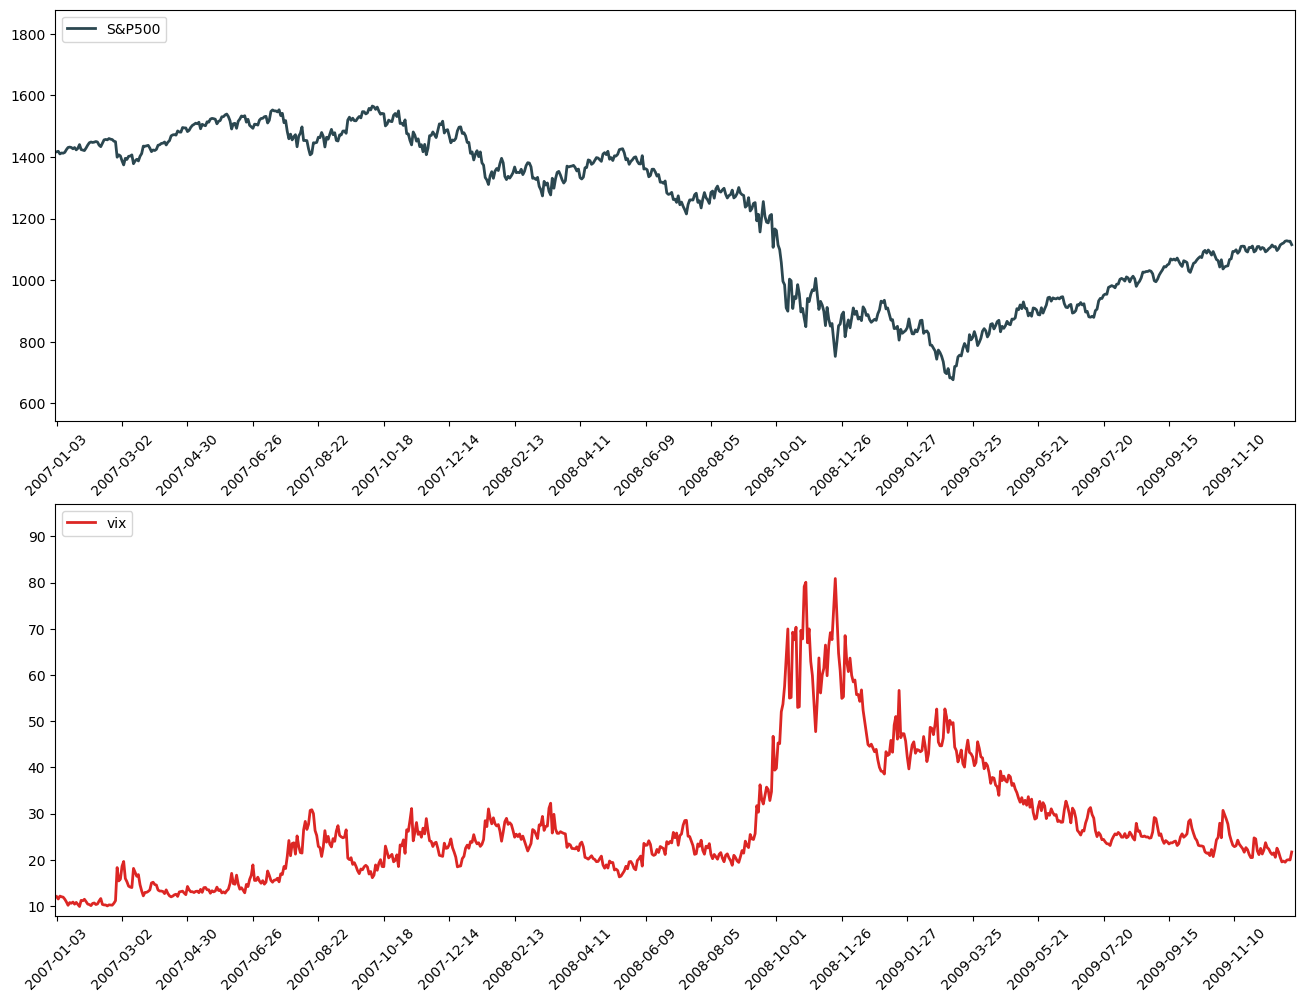

In [287]:
plt.figure(figsize=(16,12), dpi=100)

#subplot1
plt.subplot(2,1,1)
x = spx.index
y1 = spx.values

plt.plot(y1, color=dt_hex, linewidth=2, linestyle="-", label="S&P500")
plt.xlim(-1, len(x)+1)
plt.ylim(y1.min()*0.8, y1.max()*1.2)

x_tick = range(0, len(x), 40)
label_x = [x[i].strftime('%Y-%m-%d') for i in x_tick]
plt.xticks(x_tick, label_x, rotation=45)
plt.legend(loc="upper left", frameon=True)

#subplot2
plt.subplot(2,1,2)
y2 = vix.values

plt.plot(y2,  color=r_hex, linewidth=2, linestyle="-", label="vix")
plt.xlim(-1, len(x)+1)
plt.ylim(y2.min()*0.8, y2.max()*1.2)

plt.xticks(x_tick, label_x, rotation=45)
plt.legend(loc="upper left")


定义 subplot(2,1,1) 和 subplot(2,1,2) 就能实现再两幅子图上画图。


在每幅子图上画图以及各种设置前面都讲的很清楚了。

这两种方法都可用，但在本例中，S&P500 和 VIX 放在一起 (用两个坐标系) 更能看出它们之间的关系

> 新需求： 设置标注


在金融危机时期，市场发生了 5 件大事，分别是

2007-10-11: 牛市顶点

2008-03-12: 贝尔斯登倒闭

2008-09-15: 雷曼兄弟倒闭

2009-01-20: 苏格兰皇家银行股票抛售

2009-04-02: G20 峰会
    
老板要求把这些事件标注在图表上。

- 第 3 行的定义危机事件，以元组的列表存储

- 第 34 行的事件标注，用到 annotate() 函数

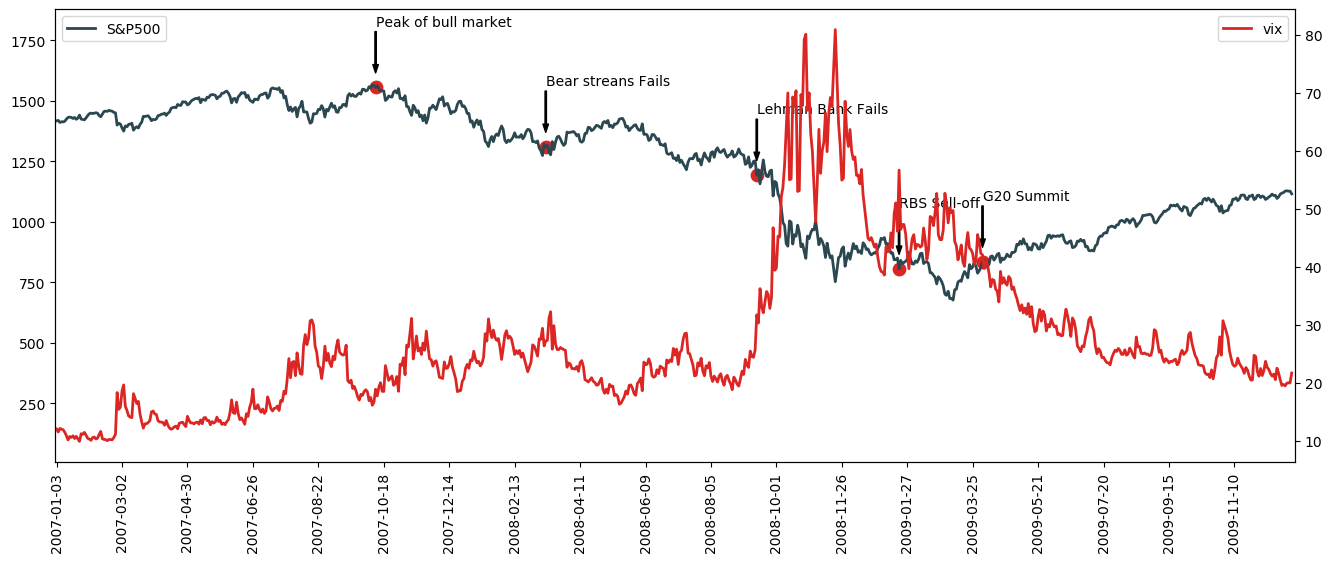

In [303]:
from  datetime import datetime 
fig = plt.figure(figsize=(16,6),dpi=100)

crisis_data = [
    (datetime(2007,10,11), 'Peak of bull market'),
    (datetime(2008, 3,12), "Bear streans Fails"),
    (datetime(2008, 9,15), "Lehman Bank Fails"),
    (datetime(2009, 1,20), "RBS Sell-off"),
    (datetime(2009, 4, 2), "G20 Summit")
]

ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

#绘制第一张图
ax1.plot(y1, color=dt_hex, linewidth=2, linestyle="-", label="S&P500")
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim(np.stack((y1, y2.flatten())).min()*0.8,
            np.stack((y1, y2.flatten())).max()*1.2)

ax1.set_xticks(range(0, len(x), 40))
data_x = [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()]
ax1.set_xticklabels(data_x, rotation=90)
ax1.legend(loc="upper left", frameon=True)

#绘制第二幅图
ax2 = ax1.twinx() #🌿
ax2.plot(y2, color=r_hex, linewidth=2, linestyle="-", label="vix")
ax2.legend(loc="upper right", frameon=True)

for date, label in crisis_data:
    date = date.strftime("%Y-%m-%d")
    xi = x.get_loc(date)
    yi = spx.asof(date)
    ax1.scatter(xi, yi, 80, color= r_hex)
    ax1.annotate(label, xy=(xi, yi+60),
                xytext=(xi, yi + 300),
                 arrowprops=dict(facecolor="black", headwidth=4, width=1, headlength=6),
                 horizontalalignment="left", verticalalignment="top"
                )


从第 34 行开始，用 for 循环读取 crisis_data 里面每个日期 date 和事件 label。


获取每一个 date 在整个日期数组中的索引 xi，以及对应的 spx 值 yi。


用 scatter() 函数画出一个圆点，标注事件在 spx 折现上的位置。


第39行是重头戏，在 annotate() 函数里设置了事件，箭头坐标，事件打印的坐标，箭头性质，以及对齐属性。

> 新需求： 放到一起看不清楚，事件也看不清楚

S&P 500 是主线，VIX 是副线，把副线的透明度调高点：

- 设置ax2.plot() 里的 alpha 参数为 0.3

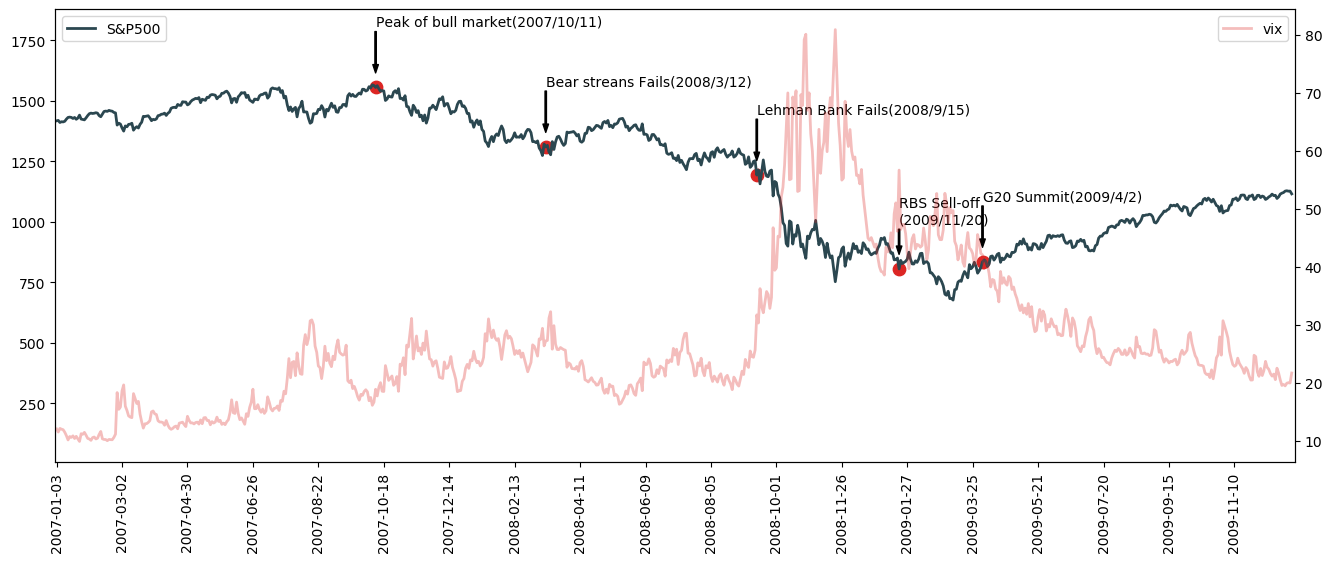

In [311]:
from  datetime import datetime 
fig = plt.figure(figsize=(16,6),dpi=100)

crisis_data = [
    (datetime(2007,10,11), 'Peak of bull market(2007/10/11)'),
    (datetime(2008, 3,12), "Bear streans Fails(2008/3/12)"),
    (datetime(2008, 9,15), "Lehman Bank Fails(2008/9/15)"),
    (datetime(2009, 1,20), "RBS Sell-off\n(2009/11/20)"),
    (datetime(2009, 4, 2), "G20 Summit(2009/4/2)")
]

ax1 = fig.add_subplot(1,1,1)

x = spx.index
y1 = spx.values
y2 = vix.values

#绘制第一张图
ax1.plot(y1, color=dt_hex, linewidth=2, linestyle="-", label="S&P500")
ax1.set_xlim(-1, len(x)+1)
ax1.set_ylim(np.stack((y1, y2.flatten())).min()*0.8,
            np.stack((y1, y2.flatten())).max()*1.2)

ax1.set_xticks(range(0, len(x), 40))
data_x = [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()]
ax1.set_xticklabels(data_x, rotation=90)
ax1.legend(loc="upper left", frameon=True)

#绘制第二幅图
ax2 = ax1.twinx() #🌿
ax2.plot(y2, color=r_hex, linewidth=2, linestyle="-", label="vix", alpha=0.3)
ax2.legend(loc="upper right", frameon=True)

for date, label in crisis_data:
    date = date.strftime("%Y-%m-%d")
    xi = x.get_loc(date)
    yi = spx.asof(date)
    ax1.scatter(xi, yi, 80, color= r_hex)
    ax1.annotate(label, xy=(xi, yi+60),
                xytext=(xi, yi + 300),
                 arrowprops=dict(facecolor="black", headwidth=4, width=1, headlength=6),
                 horizontalalignment="left", verticalalignment="top"
                )

美如画！雷曼兄弟倒闭 (事件 3) 后 S&P 暴跌最厉害，而同期的 VIX 也飙到天际。在 G20 峰会 (事件 5) 过后，大国领导者一起解决金融危机问题，从那个点开始，S&P500 上涨 VIX 下跌。

> 新需求：事件发生的日期可能没有落在横轴标签上，那老板不是在图上还是找不到他们发生的具体时间么？把它们加上去怎么样？



我用了偷懒的方法直接在标签上加上日期。
写代码的方法：
[原文](https://mp.weixin.qq.com/s?__biz=MzIzMjY0MjE1MA==&mid=2247486895&idx=1&sn=ba9370c3c505e64c10a148d0893c87b6&chksm=e8908ea6dfe707b03697529ff9c4a07e661f68c61ce02247e5e9f91904eff0fa0e29dff18e8e&scene=21#wechat_redirect)


### 第 三 章 画有效图
##### 3.1 概览

在做图表设计时候经常面临着怎么选用合适的图表，图表展示的关系分为四大类：



分布 (distribution)

联系 (relationship)

比较 (comparison)

构成 (composition)

![图](https://camo.githubusercontent.com/9aba2cdfe1b09bcfb18257fc858e8832165e4927/68747470733a2f2f696d672e6c61626e6f6c2e6f72672f64692f646174612d63686172742d747970652e706e673f5f67613d322e37373535313730312e313735303933313731312e313532383839323033352d3735373337383030382e31353238383932303334)

[原图地址](https://github.com/gopala-kr/ai-applications/blob/master/README.md#what-would-you-like-to-show)

时间上的原因，具体的各个图的分析没有在这里写，用seaborn或者用pyecharts即可。

### 第 四 章 总结

本文的思路非常清晰：

- 第一章了解 Matplotlib 的绘图逻辑，以及里面包含的画图元素以及它们之间的层级。

- 第二章深度学 Matplotlib，只研究折线图，通过研究它的属性，一步步改进图的尺寸、像素、线条颜色宽度风格、坐标轴边界、刻度标签、图例、多图、多坐标系、标注、透明度等等，画出了一幅美图。 

- 第三章广度学 Matplotlib，通过数据的分布、联系、比较和构成研究了直方图、散点图、折线图和饼状图，最后还为用户着想 (习惯、色盲等等) 画出更能有效表达信息的图。

我们现在处于一个大数据的时代，制图能力现在和写作能力一样重要。任何人现在都可以用各种制图工具或者编程语言来画图，但是很少人懂得画出好图。

好图不是指的绚烂的颜色 (fancy colors) 和复杂的层级 (complex layers)，当一张图里的信息能够以最清晰和有效的方式传递给使用者，那么这张图就是好图。

到此，我突然决定不写交互式的 Bokeh 了，因为使用 Matplotlib 和 PyEcharts 已经足够。另外用于统计可视化的 Seaborn也可以用。